# Dry Eddy Growth Rates in a 2-Layer QG Model

We assume perturbations to the PV field in the form:

$$
\Psi'_1 = A_1(y) \, e^{i(kx - ct)}, \quad
\Psi'_2 = A_2(y) \, e^{i(kx - ct)},
$$

where $A_1(y)$ and $A_2(y)$ are the meridional structures in the upper and lower layer.
The imaginary component of the wave speed $c$ gives the growth rate.

This notebook visualizes the output of `qg-compute-growth`.

In [1]:
GROWTH_FILE = "path/to/growth_rates.nc"
MODEL_FILE  = "path/to/model.3d.nc"

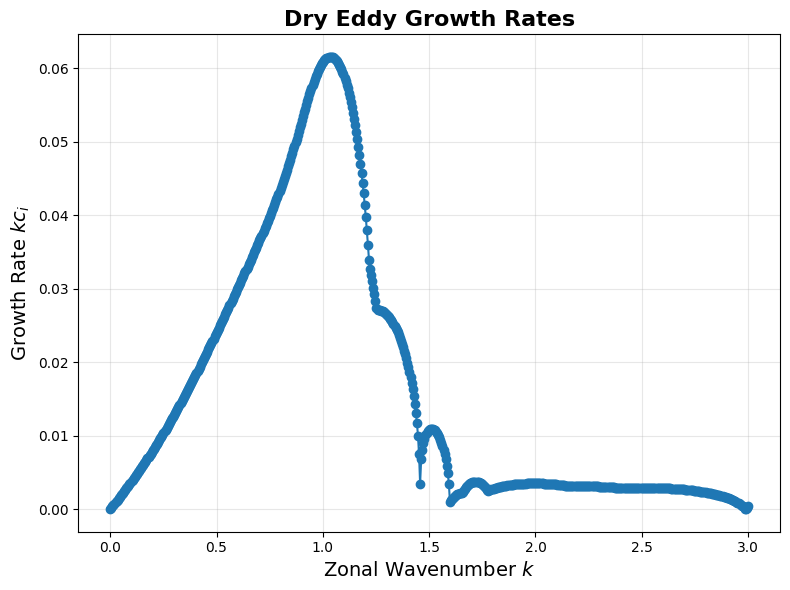

In [2]:
# Author: Giorgio M. Sarro (UChicago)
import numpy as np
import matplotlib.pyplot as plt
import netCDF4

# Load growth rate results
with netCDF4.Dataset(GROWTH_FILE) as ds:
    k = ds['k'][:]
    growth = ds['largest_imaginary_eigenvalues'][:]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(k, growth, marker='o', linestyle='-')
ax.set_xlabel('Zonal Wavenumber $k$', fontsize=14)
ax.set_ylabel('Growth Rate $k c_i$', fontsize=14)
ax.set_title('Dry Eddy Growth Rates', fontsize=16, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Peak Mode Structure

We plot the spatial shape of $\Psi'_1$ and $\Psi'_2$ at the wavenumber of peak growth.
A vertical tilt with height indicates baroclinic instability.

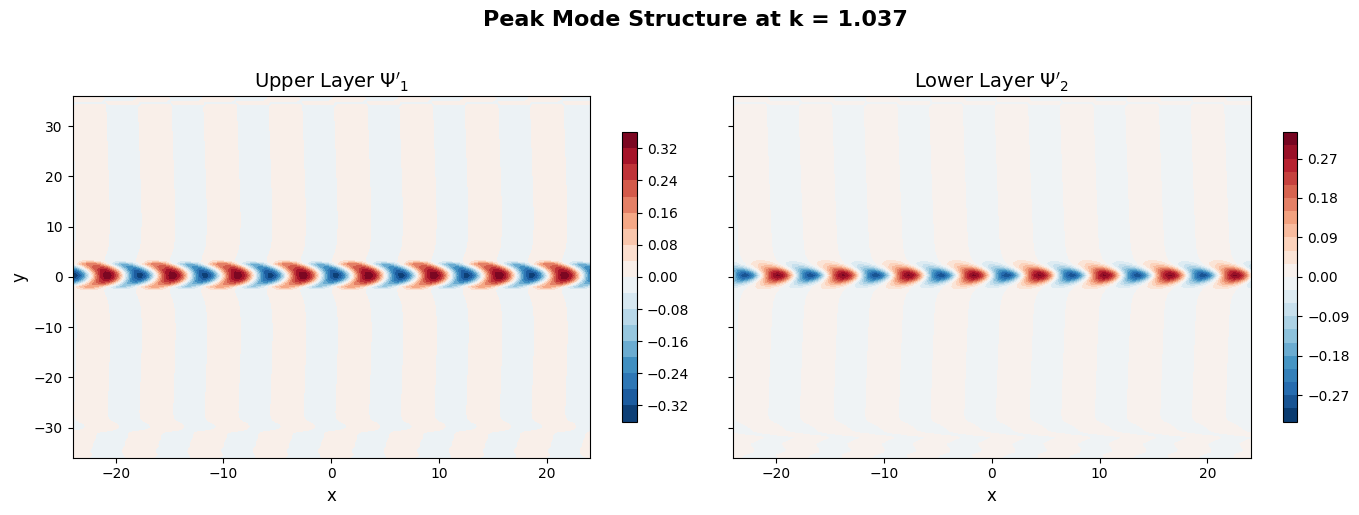

In [3]:
# Load model x coordinate and growth results
with netCDF4.Dataset(MODEL_FILE) as ds:
    x = ds['x'][:]

with netCDF4.Dataset(GROWTH_FILE) as ds:
    y = ds['y'][:]
    kk = ds['k'][:]
    growth = ds['largest_imaginary_eigenvalues'][:]
    peak_index = np.argmax(growth)
    rk = kk[peak_index]
    upper_real = ds['optimal_mode_upper_real'][:]
    upper_imag = ds['optimal_mode_upper_img'][:]
    lower_real = ds['optimal_mode_lower_real'][:]
    lower_imag = ds['optimal_mode_lower_img'][:]

# Reconstruct 2-D streamfunction: Re[A(y) * exp(i*k*x)]
X, Y = np.meshgrid(x, y)
psi1 = np.outer(upper_real, np.cos(rk * x)) - np.outer(upper_imag, np.sin(rk * x))
psi2 = np.outer(lower_real, np.cos(rk * x)) - np.outer(lower_imag, np.sin(rk * x))

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)
for ax, field, title in zip(axes, [psi1, psi2], ["Upper Layer $\\Psi'_1$", "Lower Layer $\\Psi'_2$"]):
    cf = ax.contourf(X, Y, field, levels=20, cmap='RdBu_r')
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('x', fontsize=12)
    fig.colorbar(cf, ax=ax, shrink=0.8)
axes[0].set_ylabel('y', fontsize=12)
fig.suptitle(f'Peak Mode Structure at k = {rk:.3f}', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

The vertical tilt with height confirms baroclinic instability in the 2-layer QG model.